In [43]:
import networkx as nx

1 - Visualize a rede “GraphMissingEdges.gml” (referente ao desafio no Kaggle) com o layout
ForceAtlas2.

![GraphMissingEdgesForceAtlas2](Exercicio2-1.png)

2 - Crie uma rede aleatória Erdos-Renyi com N=3000 e com probabilidade p=10-3 de dois nós
aleatórios se conectarem. Em seguida responda:


In [44]:
# Criar a rede Erdos-Renyi
N = 3000
p = 1e-3
er_graph = nx.erdos_renyi_graph(N, p)
# Salvar o grafo em um arquivo .gml
nx.write_gml(er_graph, "er_graph.gml")

a- Qual o número de links esperado? Isso vai de acordo com o que foi observado na rede
criada?\

In [45]:
# Determinar o número esperado de links
expected_links = N * (N - 1) * p / 2
# Determinar o número real de links
real_links = len(er_graph.edges())

print("Número esperado de links:", expected_links)
print("Número real de links:", real_links)

Número esperado de links: 4498.5
Número real de links: 4528


b- Em qual regime essa rede se encontra, subcritical, critical, supercritical ou conected?
Justifique.

Para determinar em qual regime a rede se encontra (subcrítico, crítico, supercrítico ou conectado), podemos utilizar a relação do grau médio com as fases de uma rede.

K < 1    : Subcritical\
K == 1   : Critical\
K > 1    : Supercritical\
K > ln N : Connected

In [46]:
import numpy as np

# Calculate the average degree
K = np.mean([d for n, d in er_graph.degree()])

# Get the number of nodes in the graph
N = len(er_graph.nodes())

# Compare with the thresholds
if K < 1:
    condition = "Subcritical"
elif K == 1:
    condition = "Critical"
elif K > 1:
    condition = "Supercritical"
if K > np.log(N):
    condition = "Connected"

print(f"The average degree is {K}. Thus, graph condition is: {condition}")


The average degree is 3.018666666666667. Thus, graph condition is: Supercritical


In [47]:
k = er_graph.degree()
# Determinar o regime da rede
if real_links < expected_links:
    regime = "subcrítico"
elif real_links > expected_links:
    regime = "supercrítico"
else:
    regime = "crítico"

print(f"A rede está no regime: {regime}")

A rede está no regime: supercrítico



c- Visualize essa rede criada com o layout ForceAtlas2.

![Erdos-RenyForceAtlas2](Exercicio2-2-c.png)

d- Compare a visualização da rede do exercício 1 com a visualização feita na 2c. 

As redes tem são similares em formato, contendo nós isolados sem conexão ao redor de um cluster mais concentrado.\
As maiores diferenças na visualizações são o formato do cluster central e o número de nós.

3- Com base na rede fornecida para o desafio, arquivo “GraphMissingEdges.gml”, faça:\
a- Compute a distribuição de graus.

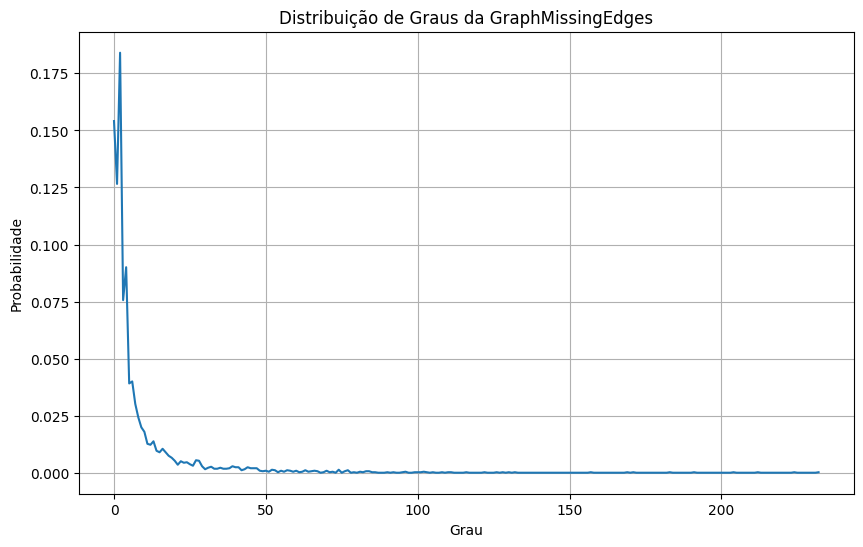

In [48]:
import numpy as np
import matplotlib.pyplot as plt

G_challenge = nx.read_gml("GraphMissingEdges.gml")
degree_sequence_challenge = [d for n, d in G_challenge.degree()]
degree_counts_challenge = np.bincount(degree_sequence_challenge)
degree_distribution_challenge = degree_counts_challenge / degree_counts_challenge.sum()

# Plotar a distribuição de graus da rede fornecida
plt.figure(figsize=(10, 6))
plt.plot(range(len(degree_distribution_challenge)), degree_distribution_challenge)
plt.title("Distribuição de Graus da GraphMissingEdges")
plt.xlabel("Grau")
plt.ylabel("Probabilidade")
plt.grid(True)
plt.show()


b- Compute a distribuição de graus para duas redes aleatórias com o mesmo número de nós
e não direcionadas, mas uma com p=0,001 e outra com p =0,01.


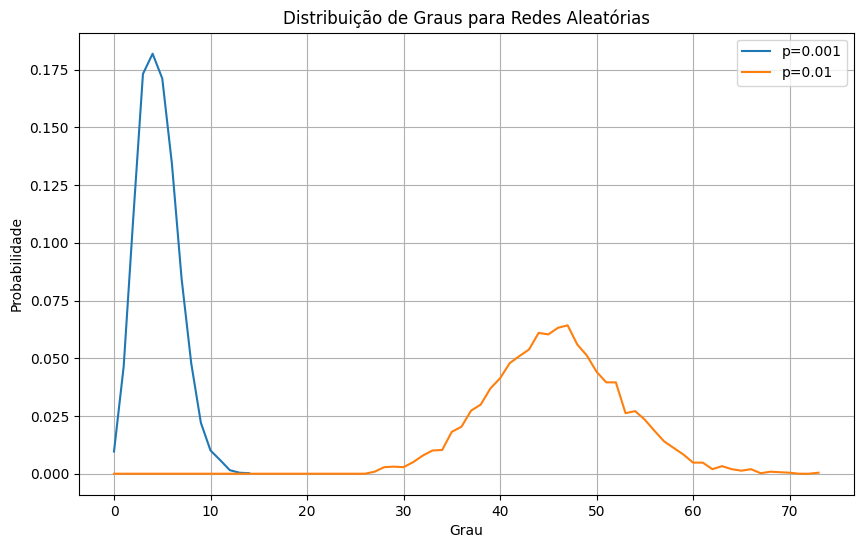

In [49]:
N = len(G_challenge.nodes())

# Rede aleatória com p=0.001
p1 = 0.001
G_random1 = nx.erdos_renyi_graph(N, p1)
degree_sequence_random1 = [d for n, d in G_random1.degree()]
degree_counts_random1 = np.bincount(degree_sequence_random1)
degree_distribution_random1 = degree_counts_random1 / degree_counts_random1.sum()

# Rede aleatória com p=0.01
p2 = 0.01
G_random2 = nx.erdos_renyi_graph(N, p2)
degree_sequence_random2 = [d for n, d in G_random2.degree()]
degree_counts_random2 = np.bincount(degree_sequence_random2)
degree_distribution_random2 = degree_counts_random2 / degree_counts_random2.sum()

# Plotar a distribuição de graus para as redes aleatórias
plt.figure(figsize=(10, 6))
plt.plot(range(len(degree_distribution_random1)), degree_distribution_random1, label=f"p={p1}")
plt.plot(range(len(degree_distribution_random2)), degree_distribution_random2, label=f"p={p2}")
plt.title("Distribuição de Graus para Redes Aleatórias")
plt.xlabel("Grau")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

c- A rede do desafio possui características de redes aleatórias? Justifique a sua resposta

In [55]:

from math import factorial
# Carregar a rede do desafio
G_challenge = nx.read_gml("GraphMissingEdges.gml")
N = len(G_challenge.nodes())
avg_degree = np.mean([d for n, d in G_challenge.degree()])

# Coeficiente de clusterização
avg_cluster_coef = nx.average_clustering(G_challenge)
expected_cluster_coef = avg_degree / N
print("Coeficiente de clusterização na rede do desafio:", avg_cluster_coef)
print("Coeficiente de clusterização esperado para uma rede aleatória:", expected_cluster_coef)


Coeficiente de clusterização na rede do desafio: 0.04489358044799767
Coeficiente de clusterização esperado para uma rede aleatória: 0.001814661530651856


In [ ]:

# Distribuição de graus
degree_sequence_challenge = [d for n, d in G_challenge.degree()]
degree_counts_challenge = np.bincount(degree_sequence_challenge)
degree_distribution_challenge = degree_counts_challenge / degree_counts_challenge.sum()

k_values = np.arange(len(degree_distribution_challenge))
k_values_factorials = [factorial(value) for value in k_values]
expected_degree_distribution = np.exp(-avg_degree) * np.power(avg_degree, k_values) / (k_values_factorials)
expected_degree_distribution /= expected_degree_distribution.sum()

# Plotar a distribuição de graus da rede do desafio e a distribuição esperada para uma rede aleatória
plt.figure(figsize=(10, 6))
plt.plot(k_values, degree_distribution_challenge, marker='o', linestyle='-', color='b', label='Rede do Desafio')
plt.plot(k_values, expected_degree_distribution, linestyle='--', color='r', label='Rede Aleatória Esperada')
plt.title("Distribuição de Graus da Rede do Desafio e Rede Aleatória Esperada")
plt.xlabel("Grau")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

Apesar de a distribuição de grau da rede do desafio se aproximar visualmente da aleatória com p = 0.001, podemos concluir que a rede do desafio não pode ser modelada através de uma rede aleatória devido ao fato que o coeficiente de clusterização esperado seria 0,002 enquanto o calculado é 0,04.